In [1]:
import pandas as pd

In [2]:
rev = pd.read_csv('Restaurant_Reviews.tsv',sep='\t',quoting=3)

In [3]:
rev

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [5]:
corpus = []
ps = PorterStemmer()
for i in range(len(rev)):
    rev_clean = rev['Review'][i].lower()
    rev_clean = re.findall('[\w]+',rev_clean)
    all_stops = stopwords.words('english')
    all_stops.remove('not')
    rev_clean = [ps.stem(word) for word in rev_clean if word not in set(all_stops)]
    corpus.append(' '.join(rev_clean))

In [6]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food 4 tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer 23 decent deal',
 'like final

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
y = rev['Liked']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

# Logistic Regression Classifier

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10)
pred = lr.fit(x_train,y_train).predict(x_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[123  23]
 [ 26 128]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       146
           1       0.85      0.83      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



# K Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
import numpy as np
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    pred = knn.fit(x_train,y_train).predict(x_test)
    error_rate.append(np.mean(pred!=y_test))

In [40]:
import matplotlib.pyplot as plt

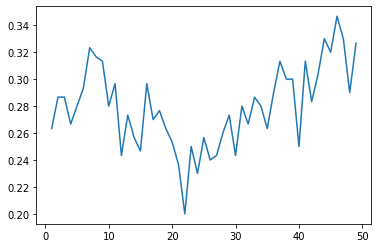

In [41]:
plt.plot(range(1,50),error_rate)
plt.show()

In [42]:
error_rate.index(min(error_rate))

21

In [46]:
knn = KNeighborsClassifier(n_neighbors=22)
pred = knn.fit(x_train,y_train).predict(x_test)

In [47]:
print(confusion_matrix(y_test,pred))

[[117  29]
 [ 31 123]]


In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       146
           1       0.81      0.80      0.80       154

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier(n_estimators=150)
pred = rfc.fit(x_train,y_train).predict(x_test)

In [53]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[135  11]
 [ 38 116]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       146
           1       0.91      0.75      0.83       154

    accuracy                           0.84       300
   macro avg       0.85      0.84      0.84       300
weighted avg       0.85      0.84      0.84       300



# Support Vector Classifier with Grid Search CV

In [27]:
from sklearn.svm import SVC

In [28]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(random_state=0),param_grid,refit=True,verbose=4)
grid.fit(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.650, total=   0.2s
[CV] C=1, gamma=1 ....................................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] ........................ C=1, gamma=1, score=0.650, total=   0.2s
[CV] C=1, gamma=1 ....................................................

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s



[CV] ........................ C=1, gamma=1, score=0.617, total=   0.2s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.533, total=   0.2s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.583, total=   0.2s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.650, total=   0.2s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.733, total=   0.2s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.750, total=   0.2s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.767, total=   0.2s
[CV] C=1, gamma=0.1 ..................................................
[CV] 

[CV] ................... C=100, gamma=0.01, score=0.733, total=   0.2s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.800, total=   0.2s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.817, total=   0.2s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.783, total=   0.2s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.733, total=   0.2s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.750, total=   0.2s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.767, total=   0.2s
[CV] C=100, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   17.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [55]:
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [56]:
pred = grid.predict(x_test)

In [57]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[145   1]
 [  0 154]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       146
           1       0.99      1.00      1.00       154

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred = gnb.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 88  58]
 [ 35 119]]
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       146
           1       0.67      0.77      0.72       154

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



# Best results are given with SVC() + GridSearchCV